In [1]:
#http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=1&Autor=5310721&Limite=N

from lxml import html
import requests
import pandas as pd

df = pd.DataFrame( columns = [ 'urls','proposicao','autores','data_apresentacao','situacoes','ementa' ] )

from requests.exceptions import ConnectionError

# chico alencar 5310653
# jair bolsonaro 5310721
# jean wyllys 5310725
# jandira feghali 5310367
# tiririca 5310378

try: 
    for i in range( 1, 25 ):
        url = "http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=" + str( i ) + "&Autor=5310721&Limite=N"
        print( url )
        webpage = requests.get( url )

        nodes = html.fromstring( webpage.text )

        urls = nodes.xpath( '//*[@id="frmListaProp"]/table/tbody/tr[1]/td[1]/a/@href' )
        proposicao = nodes.xpath( '//*[@id="frmListaProp"]/table/tbody/tr[1]/td[1]/a/text()' )

        # will convert empty nodes as ''
        situacoes_elem = nodes.xpath( '//*[@id="frmListaProp"]/table/tbody/tr[1]/td[3]' )
        situacoes = [ td.text_content() for td in situacoes_elem ]

        autores = nodes.xpath( '//*[@id="frmListaProp"]/table/tbody/tr[2]/td[2]/p[1]/text()' )
        data_apresentacao = nodes.xpath( '//*[@id="frmListaProp"]/table/tbody/tr[2]/td[2]/p[2]/text()[1]' )

        # deal with some glitches in extraction (entries with blank Ementa)
        ementa_elem = nodes.xpath( '//*[@id="frmListaProp"]/table/tbody/tr[2]/td[2]/p[2]' ) # /text()[2]
        ementa = [ p.text_content().split( "Ementa: ", 1 )[ 1 ] for p in ementa_elem ]

        elements = pd.DataFrame( { 'urls': urls, 'proposicao': proposicao, 'autores': autores
                                  , 'data_apresentacao': data_apresentacao, 'situacoes': situacoes
                                  , 'ementa': ementa } )

        df = df.append( elements, ignore_index= True )
        
except ConnectionError as e:
   print( e )


http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=1&Autor=5310378&Limite=N
http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=2&Autor=5310378&Limite=N
http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=3&Autor=5310378&Limite=N
http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=4&Autor=5310378&Limite=N
http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=5&Autor=5310378&Limite=N
http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=6&Autor=5310378&Limite=N
http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=7&Autor=5310378&Limite=N
http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=8&Autor=5310378&Limite=N
http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=9&Autor=5310378&Limite=N
http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=10&Autor=5310378&Limite=N
http://www.camara.gov.br/internet/sileg/Prop_lista.asp?Pagina=11&Autor=5310378&Limite=N
http://www.camara.gov.br/internet/sileg/P

In [2]:
# convert date format from locale - this didn't work
#import locale
#locale.setlocale( locale.LC_TIME, "pt_br" ) # Brazil portuguese

# converts 22/5/2007 to 2007-05-22 and then to datetime
repl = lambda m: m.group(4) + '-' + m.group(3).rjust( 2, '0' ) + '-' + m.group(2).rjust( 2, '0' )
df[ 'data_apresentacao' ] = df[ 'data_apresentacao' ].str.replace( '((\d+)/(\d+)/(\d\d\d\d))', repl )

df[ 'data_apresentacao' ] = df[ 'data_apresentacao' ].astype( 'datetime64[ns]' )

In [3]:
df = df.fillna( value= '' )

In [4]:
#df.to_csv( "bolsonaro.csv", index_label= "Index" )
df.describe()

,autores,data_apresentacao,ementa,proposicao,situacoes,urls
count,59,59,59,59,59,59
unique,5,34,46,59,10,59
top,Tiririca - PR/SP.,2011-06-07 00:00:00,"Parecer do Relator, Dep. Tiririca (PR-SP), pel...",PRL-1 CCULT => PL-6542/2013,,Prop_Detalhe.asp?id=514509
freq,55,7,13,1,27,1
first,NaN,2011-06-07 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2017-09-12 00:00:00,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,autores,data_apresentacao,ementa,proposicao,situacoes,urls
54,Tiririca - PR/SP.,2015-03-26,"Parecer do Relator, Dep. Tiririca (PR-SP), pel...",PRL-2 CCULT => PL-3953/2012,,Prop_Detalhe.asp?id=1188083
55,Tiririca - PR/SP.,2015-09-01,"Parecer do Relator, Dep. Tiririca (PR-SP), pel...",PRL-2 CCULT => PL-3960/2012,,Prop_Detalhe.asp?id=1700956
56,Tiririca - PR/SP.,2015-03-20,"Parecer do Relator, Dep. Tiririca (PR-SP), pel...",PRL-2 CCULT => PL-4491/2012,,Prop_Detalhe.asp?id=1050618
57,Tiririca - PR/SP.,2014-07-16,"Parecer do Relator, Dep. Tiririca (PR-SP), pel...",PRL-2 CCULT => PL-4492/2012,,Prop_Detalhe.asp?id=620448
58,Tiririca - PR/SP.,2016-11-01,"Parecer do Relator, Dep. Tiririca (PR-SP), pel...",PRL-3 CCULT => PL-6373/2013,,Prop_Detalhe.asp?id=2115932


In [13]:
# filter by year
df = pd.read_csv( "bolsonaro.csv" )
df = df.fillna( value= '' )
#df = df[ df[ 'data_apresentacao' ] >= '2016-01-01' ]
df.describe()

,Index,Index.1
count,611.000000,611.000000
mean,305.000000,305.000000
std,176.524786,176.524786
min,0.000000,0.000000
25%,152.500000,152.500000
50%,305.000000,305.000000
75%,457.500000,457.500000
max,610.000000,610.000000


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer()
vec = vectorizer.fit( df[ "ementa" ] )
bag_of_words = vec.transform( df[ "ementa" ] )
sum_words = bag_of_words.sum( axis= 0 )
words_freq = [ ( word, sum_words[ 0, idx ] ) for word, idx in vec.vocabulary_.items() ]
sorted( words_freq, key = lambda x: x[ 1 ], reverse= True )

#vectorizer.fit_transform( df[ "ementa" ] ).todense()
#vectorized = vectorizer.vocabulary_
#print(  )

[('de', 1672),
 ('do', 605),
 ('da', 584),
 ('sobre', 248),
 ('ao', 246),
 ('que', 245),
 ('nº', 230),
 ('lei', 214),
 ('para', 196),
 ('explicação', 139),
 ('ministro', 133),
 ('art', 132),
 ('dos', 131),
 ('pela', 110),
 ('no', 107),
 ('informações', 106),
 ('das', 105),
 ('redação', 100),
 ('dá', 96),
 ('solicita', 94),
 ('em', 91),
 ('jair', 87),
 ('bolsonaro', 87),
 ('parecer', 86),
 ('militares', 85),
 ('dispõe', 84),
 ('os', 83),
 ('dezembro', 83),
 ('federal', 80),
 ('dep', 79),
 ('altera', 77),
 ('relator', 77),
 ('estado', 76),
 ('requer', 74),
 ('com', 73),
 ('na', 71),
 ('inciso', 64),
 ('artigo', 61),
 ('mpv', 60),
 ('outras', 59),
 ('nova', 56),
 ('militar', 54),
 ('constituição', 51),
 ('aos', 50),
 ('defesa', 50),
 ('as', 49),
 ('nacional', 47),
 ('senhor', 46),
 ('rj', 46),
 ('por', 43),
 ('aprovação', 43),
 ('forças', 41),
 ('providências', 41),
 ('decreto', 41),
 ('10', 41),
 ('armadas', 40),
 ('comissão', 40),
 ('nos', 39),
 ('ministerio', 38),
 ('código', 37),
 ('p

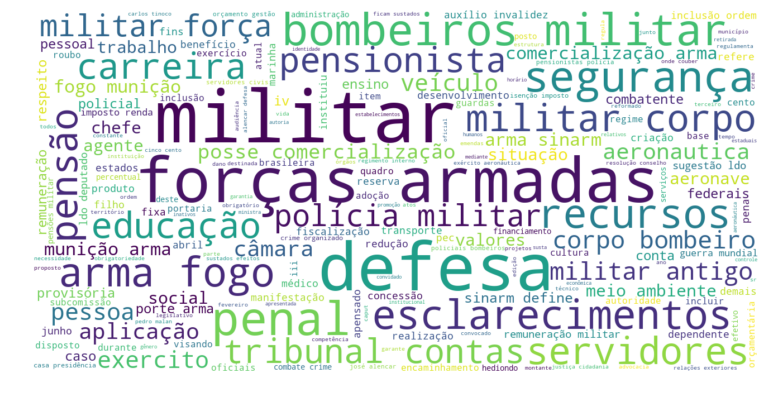

In [15]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

#from sets import Set

ementa_text = df[ "ementa" ].str.cat( sep= ' ' ).lower()

# remove numbers
translation_table = dict.fromkeys( map( ord, '0123456789' ), None )
ementa_text = ementa_text.translate( translation_table )

# plural to singular conversion for some words
translation_table = { 'atividades': 'atividade', 'dispositivos': 'dispositivo'
                     , 'militares': 'militar', 'armas': 'arma', 'medidas': 'medida' }

for key, value in translation_table.items():
    ementa_text = ementa_text.replace( key, value )

# stopwords copied from R package tm for Portuguese
portuguese_stopwords = set( [ 'de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os'
                             , 'no', 'se'
                  , 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou'
                  , 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela'
                  , 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você'
                  , 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós'
                  , 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes'
                  , 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela'
                  , 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo'
                  , 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava'
                  , 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam'
                  , 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há'
                  , 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos'
                  , 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei'
                  , 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos'
                  , 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja'
                  , 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será'
                  , 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha'
                  , 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha'
                  , 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem'
                  , 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam' ] )
    
stopwords = set( [ 'sobre', 'nº', 'lei', 'explicação', 'art'
                  , 'ministro', 'redação', 'informações', 'dá', 'jair', 'bolsonaro'
                  , 'dispõe', 'solicita', 'parecer', 'dep', 'dezembro', 'federal', 'relator', 'altera'
                  , 'requer', 'estado', 'artigo', 'inciso', 'outras', 'mpv', 'nova'
                  , 'constituição', 'nacional', 'rj', 'ministerio', 'decreto', 'aprovação', 'providências'
                  , 'comissão', 'senhor', 'código', 'º', 'pp', 'acrescenta', 'projeto'
                  , 'emenda', 'janeiro', 'julho', 'união', 'ii', 'poder', 'como'
                  , 'setembro', 'institui', 'brasileiro', 'dia', 'pelo', 'estatuto', 'civil', 'requerimento'
                  , 'estabelece', 'sugere', 'revoga', 'rio', 'distrito', 'seja', 'nas'
                  , 'substitutivo', 'especial', 'trânsito', 'crimes', 'não', 'registro', 'providencias'
                  , 'serviço', 'proposta', 'pl', 'constitucionalidade', 'técnica', 'legislativa'
                  , 'pública', 'ex', 'parágrafo', 'deputados', 'texto', 'juridicidade'
                  , 'anos', 'convocação', 'sistema', 'comissões'
                  , 'acresce', 'direitos', 'uso', 'prestar', 'agosto'
                  , 'executivo', 'conclusivo', 'integrante', 'pagamento', 'público', 'fazenda', 'dispositivo'
                  , 'quanto', 'outubro', 'data', 'forma', 'direito', 'integrantes', 'dispositivos', 'único'
                  , 'inclui', 'ministério', 'termo', 'ser', 'recurso', 'termos', 'rejeição'
                  , 'presidente', 'planejamento', 'órgão', 'ato', 'prazo', 'maio', 'bem'
                  , 'atividade', 'trata', 'contra', 'apreciação', 'especifica', 'março', 'apresentação'
                  , 'atividades', 'condições', 'favoravel', 'âmbito', 'utilização', 'grave', 'voto'
                  , 'dispor', 'excludente', 'ações', 'processo', 'república', 'realizados', 'públicos'
                  , 'qualificado', 'novembro', 'medida', 'qualquer', 'instituir', 'daquela', 'via'
                 
                  # common words for Chico Alencar
                  , 'meta', 'anexo', 'passa', 'modifica', 'estratégia', 'ter', 'seguinte', 'acerca', 'programa' ] )

stopwords = stopwords.union( portuguese_stopwords )

# lower max_font_size
wordcloud = WordCloud( max_font_size= 130
                      , width= 1300
                      , height= 650
                      , background_color= "white"
                      , stopwords= stopwords
                     ).generate( ementa_text )
plt.figure( figsize=( 13, 13 ) )
plt.imshow( wordcloud, interpolation= "bilinear" )
plt.axis( "off" )
plt.show()

In [9]:
# this will open the file outside the notebook
image = wordcloud.to_image()
image.show()